对比图已保存到 ./logs/transfer_learning_comparison.png 和 ./logs/training_time_comparison.png


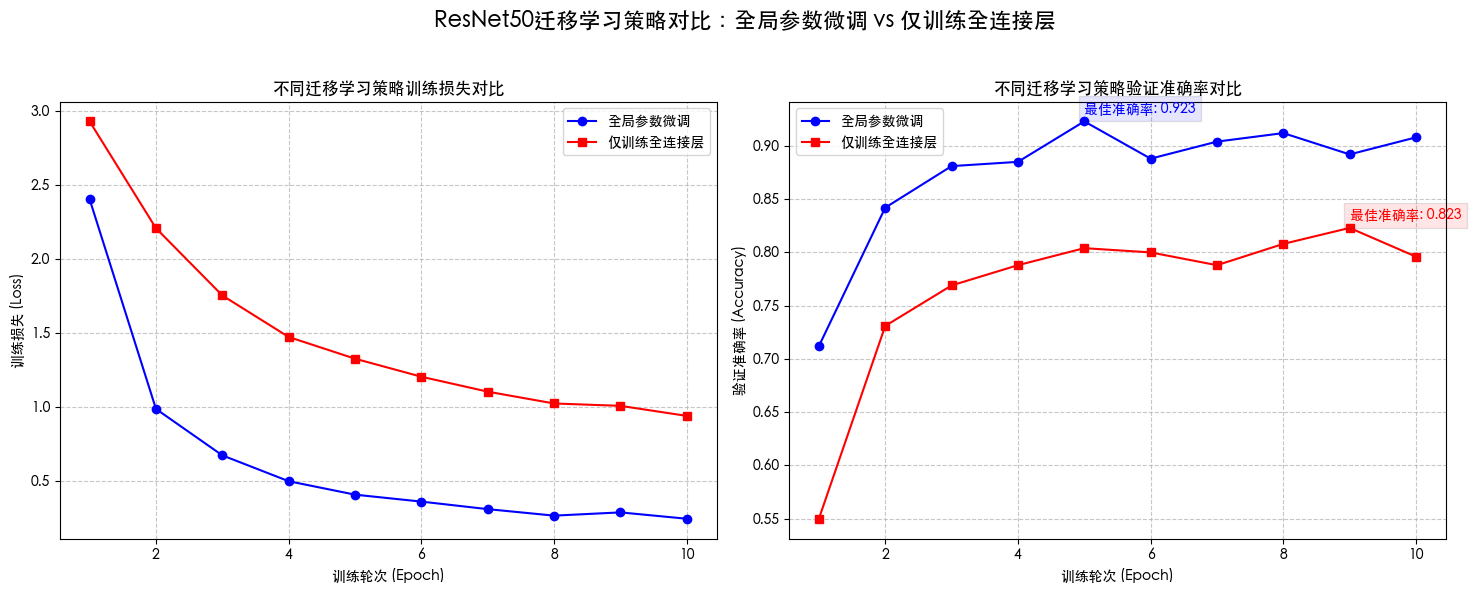

<Figure size 1000x600 with 0 Axes>

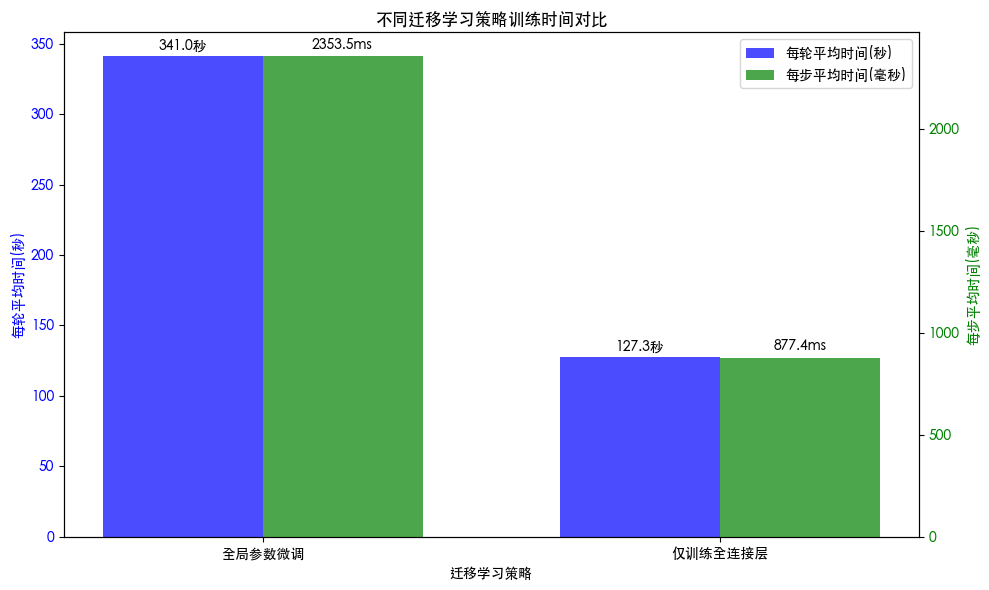

In [2]:
import matplotlib.pyplot as plt
import numpy as np
# 设置matplotlib支持中文显示
plt.rcParams['font.sans-serif'] = ['PingFang SC', 'Heiti TC', 'SimHei', 'Arial']
# 全局参数微调的数据
full_finetune_epochs = np.arange(1, 11)
full_finetune_loss = [2.404, 0.985, 0.671, 0.496, 0.405, 0.358, 0.307, 0.263, 0.285, 0.242]
full_finetune_acc = [0.712, 0.842, 0.881, 0.885, 0.923, 0.888, 0.904, 0.912, 0.892, 0.908]

# 只训练全连接层(分层冻结)的数据
frozen_epochs = np.arange(1, 11)
frozen_loss = [2.931, 2.208, 1.753, 1.472, 1.325, 1.203, 1.102, 1.022, 1.006, 0.938]
frozen_acc = [0.550, 0.731, 0.769, 0.788, 0.804, 0.800, 0.788, 0.808, 0.823, 0.796]

# 创建一个包含两个子图的图形
plt.figure(figsize=(15, 6))

# 第一个子图：训练损失对比
plt.subplot(1, 2, 1)
plt.plot(full_finetune_epochs, full_finetune_loss, 'o-', color='blue', label='全局参数微调')
plt.plot(frozen_epochs, frozen_loss, 's-', color='red', label='仅训练全连接层')
plt.xlabel('训练轮次 (Epoch)')
plt.ylabel('训练损失 (Loss)')
plt.title('不同迁移学习策略训练损失对比')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# 第二个子图：验证准确率对比
plt.subplot(1, 2, 2)
plt.plot(full_finetune_epochs, full_finetune_acc, 'o-', color='blue', label='全局参数微调')
plt.plot(frozen_epochs, frozen_acc, 's-', color='red', label='仅训练全连接层')
plt.xlabel('训练轮次 (Epoch)')
plt.ylabel('验证准确率 (Accuracy)')
plt.title('不同迁移学习策略验证准确率对比')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# 添加最佳准确率标注
plt.text(5, 0.93, f'最佳准确率: {max(full_finetune_acc):.3f}', 
         bbox=dict(facecolor='blue', alpha=0.1), color='blue')
plt.text(9, 0.83, f'最佳准确率: {max(frozen_acc):.3f}', 
         bbox=dict(facecolor='red', alpha=0.1), color='red')

# 设置图表整体标题
plt.suptitle('ResNet50迁移学习策略对比：全局参数微调 vs 仅训练全连接层', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # 调整布局，避免标题重叠

# 保存图表
plt.savefig('./logs/transfer_learning_comparison.png', dpi=300)

# 创建训练时间对比条形图
plt.figure(figsize=(10, 6))
strategies = ['全局参数微调', '仅训练全连接层']
# 从日志中提取的平均每轮训练时间(ms)
avg_epoch_times = [340967.334, 127297.503]  # 计算平均值
avg_per_step_times = [2353.468, 877.394]    # 计算平均值

x = np.arange(len(strategies))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# 绘制每轮平均时间
bars1 = ax1.bar(x - width/2, [t/1000 for t in avg_epoch_times], width, label='每轮平均时间(秒)', color='blue', alpha=0.7)
ax1.set_ylabel('每轮平均时间(秒)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# 绘制每步平均时间
bars2 = ax2.bar(x + width/2, avg_per_step_times, width, label='每步平均时间(毫秒)', color='green', alpha=0.7)
ax2.set_ylabel('每步平均时间(毫秒)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# 设置x轴
ax1.set_xticks(x)
ax1.set_xticklabels(strategies)
ax1.set_xlabel('迁移学习策略')

# 添加数据标签
def add_labels(bars, ax, format_str='{:.1f}'):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(format_str.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3点偏移
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bars1, ax1, '{:.1f}秒')
add_labels(bars2, ax2, '{:.1f}ms')

# 图例和标题
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.title('不同迁移学习策略训练时间对比')
plt.tight_layout()

# 保存图表
plt.savefig('./logs/training_time_comparison.png', dpi=300)

print("对比图已保存到 ./logs/transfer_learning_comparison.png 和 ./logs/training_time_comparison.png")